In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso,LassoCV

In [2]:
data = pd.read_csv("Advertising.csv")

data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

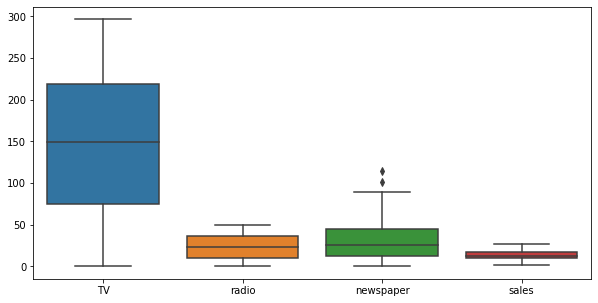

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(data = data)
plt.show()

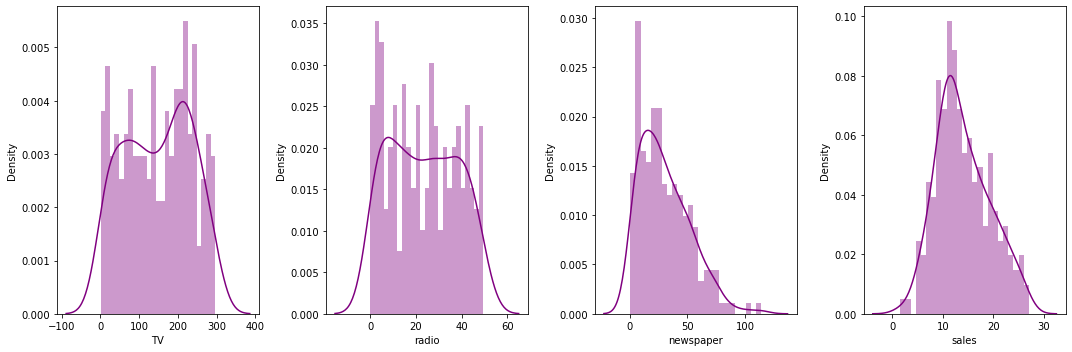

In [8]:
plt.figure(figsize=(15,5))
plotnumber = 1  
for column in data:
    if plotnumber<= 4:   
        ax = plt.subplot(1,4,plotnumber) 
        sns.distplot(data[column] ,  bins= 25
                     , color= 'purple')
        
        
    plotnumber+=1
plt.tight_layout()    

In [9]:
# Applying Square Root Transformation on Newspaper Column 

data['newspaper'] = data.newspaper**(1/2)

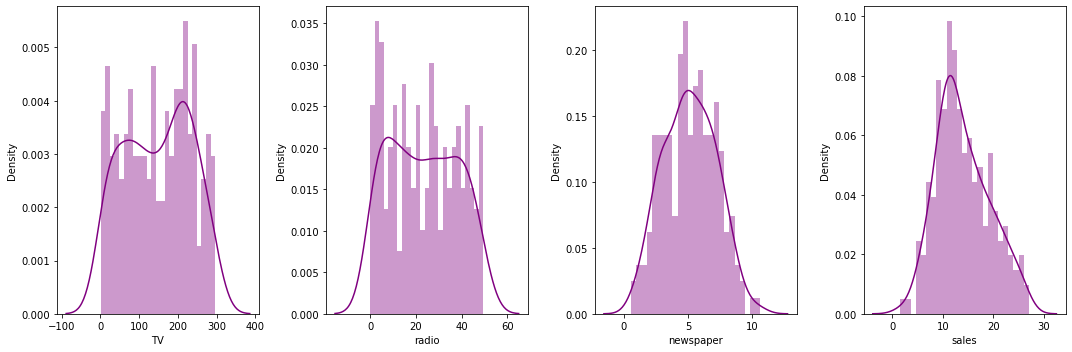

In [10]:
plt.figure(figsize=(15,5))
plotnumber = 1  
for column in data:
    if plotnumber<= 4:   
        ax = plt.subplot(1,4,plotnumber) 
        sns.distplot(data[column] ,  bins= 25
                     , color= 'purple')
        
        
    plotnumber+=1
plt.tight_layout()    

In [11]:
# Checking Skewness
data.skew().sort_values(ascending = False)

sales        0.407571
radio        0.094175
newspaper    0.062388
TV          -0.069853
dtype: float64

In [12]:
# Changing the data type of columns
data['TV'] = data.TV.astype(int)
data['radio'] = data.radio.astype(int)
data['newspaper'] = data.newspaper.astype(int)
data['sales'] = data.sales.astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int32
 1   radio      200 non-null    int32
 2   newspaper  200 non-null    int32
 3   sales      200 non-null    int32
dtypes: int32(4)
memory usage: 3.2 KB


In [14]:
x = data.drop('sales', axis =1)
y = data.sales

In [15]:
sc =StandardScaler()
sc.fit_transform(x)

array([[ 0.97453682,  0.96086822,  1.62189468],
       [-1.19810909,  1.09610653,  0.65504241],
       [-1.51349317,  1.50182147,  1.62189468],
       [ 0.05174635,  1.23134484,  1.13846855],
       [ 0.39049222, -0.86484901,  1.13846855],
       [-1.6186212 ,  1.70467894,  1.62189468],
       [-1.04625749,  0.62277243, -0.31180986],
       [-0.3103613 , -0.2562766 , -0.79523599],
       [-1.6186212 , -1.40580227, -1.76208826],
       [ 0.61242916, -1.40580227, -0.31180986],
       [-0.94112946, -1.2029448 , -0.31180986],
       [ 0.78764254,  0.08181918, -1.27866213],
       [-1.44340782,  0.8256299 ,  1.62189468],
       [-0.57902181, -1.06770648, -1.27866213],
       [ 0.67083362,  0.62277243,  0.65504241],
       [ 0.5657056 ,  1.63705978,  1.13846855],
       [-0.92944857,  0.89324906,  2.58874695],
       [ 1.5702623 ,  1.09610653,  1.13846855],
       [-0.90608679, -0.18865745, -0.31180986],
       [ 0.00502278,  0.01420002, -0.31180986],
       [ 0.83436611,  0.28467665,  1.138

In [16]:
x_train,x_test,y_train,y_test =train_test_split(x,y ,test_size=0.30 ,random_state = 12)

In [17]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred =regression.predict(x_test)

In [19]:
r_square = metrics.r2_score(y_test,y_pred)
print('r square score:-',r_square)
mean_absolute_error(y_test,y_pred)

r square score:- 0.9189272097178287


1.278089669721474

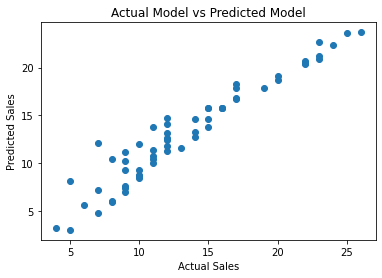

In [20]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual Model vs Predicted Model')
plt.show()

## Applying LASSO

In [22]:
# LassoCV will return best alpha after max iteration
lasscv = LassoCV(alphas = None , max_iter = 100 , normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100, normalize=True)

In [23]:
# Best alpha parameter
alpha = lasscv.alpha_

alpha

0.003225351634512081

In [24]:
# Now that we have parameter , let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.003225351634512081)

In [25]:
lasso_reg.score(x_test, y_test)

0.9189542341109319

We got same r2 square using LASSO as well, So,it's safe to say there is no overfitting